In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras 

from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
from cv2 import cv2
from PIL import Image
import tensorflow as tf
from matplotlib import pyplot as plt

from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import img_to_array, img_to_array, load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array

In [6]:
import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

In [18]:
df_train = pd.read_csv("D:/Work/Final Project/Code and Dataset/Messidor dataset/(2 label bal)messidor combined labels.csv")
print(df_train.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Work/Final Project/Code and Dataset/Messidor dataset/(2 label bal)messidor combined labels.csv'

In [17]:
df_train_full=df_train
df_train = pd.Series(df_train['level'])
print(df_train[:10])

KeyError: 'level'

In [19]:
from keras.utils import np_utils as nu

#print("Number of classes before : "+ str(y_train.shape[1]))
df_train=nu.to_categorical(df_train)

print("Number of classes and labels : " + str(df_train.shape))
num_classes=df_train.shape[1]
print(df_train[0])

ValueError: zero-size array to reduction operation maximum which has no identity

In [20]:
im_size1 = 786
im_size2 = 786
x_train = []
y_train = []
x_test = []
y_test = []

In [21]:
df_test = []
df_test = df_train_full[:]
i=0
print("Number of classes and labels : " + str(df_test.shape))


Number of classes and labels : (0,)


In [22]:
dir_proc = "/Users/shubh/Desktop/Final Project/Code and Dataset/Messidor dataset/Combined messidor images/preprocessed_test_images/"
i=0
for f, breed in tqdm(df_test.values):
    try:
        #print(f)
        #f="20051019_38557_0100_PP"
        img = cv2.imread(('D:/Work/Final Project/Code and Dataset/Messidor dataset/preprocessed_1/{}.png'.format(f)))
        #img_scaled =img
        img_scaled = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)
        #arr = image.img_to_array(img)
        label = df_train[i]
        x_train.append(img_scaled)
        y_train.append(label)
        #print(label)
        i += 1
    except:
        print("error")


0it [00:00, ?it/s]


In [23]:
print(df_train[270])
print(y_train[:10])

IndexError: index 270 is out of bounds for axis 0 with size 0

In [11]:
x_train=np.asarray(x_train,dtype='float32')
y_train=np.asarray(y_train,dtype='float32')
print(x_train.shape)
print(y_train.shape)



(1201, 256, 256, 3)
(1201, 2)


In [12]:
img_rows = 256
img_cols = 256
#reshape the data to format accepted by Keras
#i=0
#while(1):
#    x_train[i]=x_train[i].reshape(img_rows,img_cols,1)
 #   x_train[i]=x_train[i].astype('float32')
 #   x_train[i]/=255
 #   i+=1
 #   if(i==199):
 #       break
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,3)
#x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#the shape of a single image to feed to 1st layer of CNN
input_shape=(img_rows,img_cols,3)

#convert to float 32 as CNN requires float 32 data
x_train=x_train.astype('float32')
#x_test=x_test.astype('float32')

#normalize
x_train/=255
#x_test/=255


print("shape of the data now : " + str(x_train.shape))
print("height of training data : "+ str(x_train[1].shape[0]))


shape of the data now : (1201, 256, 256, 3)
height of training data : 256


In [12]:
cv2.imshow('img',x_train[18])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
print(x_train[18].shape)
#print(x_test[0].shape)


(256, 256, 3)


In [14]:

print("Number of training labels : " + str(len(y_train))+"\nNumber of training images : "+str(len(x_train)))

#print("Number of testing labels : " + str(len(y_test))+"\nNumber of testing images : "+str(len(x_test)))


Number of training labels : 1201
Number of training images : 1201


In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [47]:
cv2.imshow('img',X_train[18])
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
print("shape of the data now : " + str(X_train.shape))
#print("shape of the data now : " + str(y_test.shape))

shape of the data now : (960, 256, 256, 3)


In [20]:
from keras.applications import MobileNet

# MobileNet was designed to work on 224 x 224 pixel input images sizes
img_rows, img_cols = 256,256

# Re-loads the MobileNet model without the top or FC layers
MobileNet = MobileNet(weights = 'imagenet', 
                 include_top = False, 
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers 
# Layers are set to trainable as True by default
for layer in MobileNet.layers:
    layer.trainable = False
    
# Let's print our layers 
for (i,layer) in enumerate(MobileNet.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)
def addTopModelMobileNet(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model

# Set our class number to 3 (Young, Middle, Old)
num_classes = 2

FC_Head = addTopModelMobileNet(MobileNet, num_classes)

model = Model(inputs = MobileNet.input, outputs = FC_Head)

print(model.summary())
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping

                     
checkpoint = ModelCheckpoint("D:/Work/Courses/[code][FreeTutorials.Us] Udemy - Deep Learning Computer Vision/DeepLearningCV/Trained Models/monkey_breed_mobileNet.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint]

# We use a very small learning rate 
model.compile(loss = 'categorical_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

# Enter the number of training and validation samples here
nb_train_samples = X_train.shape[0]
nb_validation_samples = X_valid.shape[0]

# We only train 5 EPOCHS 
epochs = 15
batch_size = 64



C:\Users\shubh\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 ReLU False
5 DepthwiseConv2D False
6 BatchNormalization False
7 ReLU False
8 Conv2D False
9 BatchNormalization False
10 ReLU False
11 ZeroPadding2D False
12 DepthwiseConv2D False
13 BatchNormalization False
14 ReLU False
15 Conv2D False
16 BatchNormalization False
17 ReLU False
18 DepthwiseConv2D False
19 BatchNormalization False
20 ReLU False
21 Conv2D False
22 BatchNormalization False
23 ReLU False
24 ZeroPadding2D False
25 DepthwiseConv2D False
26 BatchNormalization False
27 ReLU False
28 Conv2D False
29 BatchNormalization False
30 ReLU False
31 DepthwiseConv2D False
32 BatchNormalization False
33 ReLU False
34 Conv2D False
35 BatchNormalization False
36 ReLU False
37 ZeroPadding2D False
38 DepthwiseConv2D False
39 BatchNormalization False
40 ReLU False
41 Conv2D False
42 BatchNormalization False
43 ReLU False
44 DepthwiseConv2D False
45 BatchNormalization False
46 ReLU False
47 Conv2D False
48 Batc

In [21]:
print(nb_train_samples )
print(nb_validation_samples)

960
241


In [ ]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch = nb_train_samples // batch_size,
#     epochs = epochs,
#     callbacks = callbacks,
#     validation_data = validation_generator,
#     validation_steps = nb_validation_samples // batch_size)
history = model.fit(X_train, Y_train,batch_size=batch_size,  epochs=epochs, verbose=1,validation_data=(X_valid, Y_valid),shuffle=True)

Train on 960 samples, validate on 241 samples
Epoch 1/15
960/960 [==============================] - ETA: 1:04 - loss: 5.2887 - acc: 0.671 - ETA: 59s - loss: 6.6739 - acc: 0.585 - ETA: 51s - loss: 7.1356 - acc: 0.55 - ETA: 45s - loss: 6.9887 - acc: 0.56 - ETA: 40s - loss: 7.1524 - acc: 0.55 - ETA: 36s - loss: 7.2615 - acc: 0.54 - ETA: 32s - loss: 7.5194 - acc: 0.53 - ETA: 27s - loss: 7.4294 - acc: 0.53 - ETA: 23s - loss: 7.4154 - acc: 0.53 - ETA: 19s - loss: 7.5554 - acc: 0.53 - ETA: 15s - loss: 7.4638 - acc: 0.53 - ETA: 11s - loss: 7.4084 - acc: 0.54 - ETA: 7s - loss: 7.4585 - acc: 0.5373 - ETA: 3s - loss: 7.3755 - acc: 0.542 - 77s 80ms/step - loss: 7.3875 - acc: 0.5417 - val_loss: 7.1562 - val_acc: 0.5560
Epoch 2/15
960/960 [==============================] - ETA: 55s - loss: 5.7924 - acc: 0.64 - ETA: 52s - loss: 6.9257 - acc: 0.57 - ETA: 47s - loss: 7.8912 - acc: 0.51 - ETA: 43s - loss: 7.4294 - acc: 0.53 - ETA: 39s - loss: 7.3539 - acc: 0.54 - ETA: 35s - loss: 7.0517 - acc: 0.56 - ET

In [51]:
from keras import optimizers
opt = keras.optimizers.Adam(lr=0.0001, decay=0.0)

In [52]:
#model 1
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
#rms = RMSprop()
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.5, nesterov=True)

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 254, 254, 32)      128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
batch_normalization_4 (Batch (None, 252, 252, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 124, 124, 64)      18496     
__________

In [ ]:
#model 2_2
#visible = (256,256,1)
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5) ,name='conv1_1', input_shape = input_shape))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(64, (5, 5), name='conv2_1'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#flatten
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))


model.add(Dense(num_classes,activation='softmax'))


#rms = RMSprop()
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])
print(model.summary())

In [110]:
#model 2
#visible = (256,256,1)
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
model = Sequential()

model.add(Conv2D(32, kernel_size=(5,5) ,name='conv1_1', input_shape = input_shape))
model.add(Activation("relu"))
model.add(Conv2D(32, (5, 5),name='conv1_2'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#2
model.add(Conv2D(64, (5, 5), name='conv2_1'))
model.add(Activation("relu"))
model.add(Conv2D(64, (5, 5), name='conv2_2'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#flatten
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.5))


model.add(Dense(num_classes,activation='softmax'))


#rms = RMSprop()
#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.5, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 252, 252, 32)      2432      
_________________________________________________________________
activation_1 (Activation)    (None, 252, 252, 32)      0         
_________________________________________________________________
conv1_2 (Conv2D)             (None, 248, 248, 32)      25632     
_________________________________________________________________
activation_2 (Activation)    (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 124, 124, 32)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 124, 124, 32)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 120, 120, 64)      51264     
__________

In [137]:
#model 3
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Dense, Flatten, Dropout, Activation
from keras.layers import MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(16, kernel_size=(12,12), activation='relu', padding='valid', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#bat1 = BatchNormalization(axis = 1)(pool1)

model.add(Conv2D(64, kernel_size=(8,8), activation='relu', padding='valid'))
model.add(Conv2D(64, kernel_size=(4,4), activation='relu', padding='valid'))
model.add(Conv2D(128, kernel_size=(4,4), activation='relu', padding='valid'))
model.add(Conv2D(256, kernel_size=(4,4), activation='relu', padding='valid'))

model.add(MaxPooling2D(pool_size=(2, 2)))
#pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='sigmoid'))
#output = Dense(1, activation='sigmoid')(flat)
#model = Model(inputs=visible, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 245, 245, 16)      6928      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 122, 122, 16)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 115, 115, 64)      65600     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 112, 112, 64)      65600     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 109, 109, 128)     131200    
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 106, 106, 256)     524544    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 256)       0         
__________

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import SGD
from keras import backend as K
#K.set_image_data_format('channels_first')


def cnn_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=input_shape,
                     activation='relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3, 3), padding='same',
                     activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model
from keras.optimizers import SGD

model = cnn_model()

# let's train the model using SGD + momentum
lr = 0.00001
sgd = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()

NameError: name 'AvgPooling2D' is not defined

In [25]:

# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 60, 60, 64)        18496     
__________

In [21]:
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("D:/Work/Final Project/Code and Dataset/experimentation/saved_checkpoints/review 1-Copy9-CNN5-Copy3_1.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 6,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]


In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1,validation_data=(X_valid, Y_valid),shuffle=True)



Train on 960 samples, validate on 241 samples
Epoch 1/20




960/960 [==============================] - ETA: 48s - loss: 0.6959 - acc: 0.49 - ETA: 33s - loss: 1.5528 - acc: 0.50 - ETA: 23s - loss: 1.8396 - acc: 0.49 - ETA: 16s - loss: 1.5789 - acc: 0.49 - ETA: 11s - loss: 1.4167 - acc: 0.48 - ETA: 6s - loss: 1.2982 - acc: 0.4883 - ETA: 2s - loss: 1.2182 - acc: 0.477 - 34s 35ms/step - loss: 1.1840 - acc: 0.4724 - val_loss: 0.7018 - val_acc: 0.4979
Epoch 2/20
960/960 [==============================] - ETA: 22s - loss: 0.7010 - acc: 0.47 - ETA: 20s - loss: 0.6949 - acc: 0.48 - ETA: 17s - loss: 0.6950 - acc: 0.49 - ETA: 13s - loss: 0.6956 - acc: 0.49 - ETA: 9s - loss: 0.6959 - acc: 0.5031 - ETA: 5s - loss: 0.6959 - acc: 0.498 - ETA: 1s - loss: 0.6957 - acc: 0.496 - 28s 29ms/step - loss: 0.6954 - acc: 0.4948 - val_loss: 0.6917 - val_acc: 0.5062
Epoch 3/20
960/960 [==============================] - ETA: 18s - loss: 0.6917 - acc: 0.51 - ETA: 16s - loss: 0.6910 - acc: 0.52 - ETA: 15s - loss:

In [55]:
score=model.evaluate(X_valid, Y_valid, verbose=0)
print('loss= ' + str(score[0]))
print('accuracy= ' + str(score[1]))

loss= 0.6919137892386725
accuracy= 0.5601659768349897


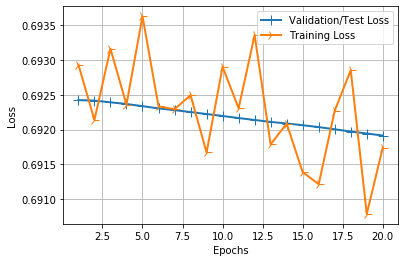

In [56]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

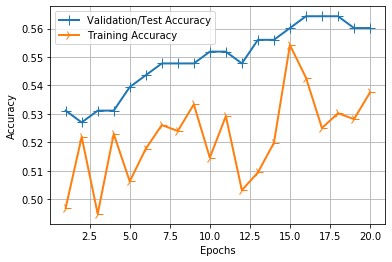

In [57]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred = model.predict_classes(X_valid)

print(classification_report(np.argmax(Y_valid,axis=1), y_pred))
print(confusion_matrix(np.argmax(Y_valid,axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       107
           1       0.56      1.00      0.72       134

    accuracy                           0.56       241
   macro avg       0.78      0.50      0.37       241
weighted avg       0.75      0.56      0.41       241

[[  1 106]
 [  0 134]]


In [106]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 32,32,3
#model_loaded = load_model('/Users/shubh/Desktop/Final Project/Code and Dataset/experimentation/saved_checkpoints/review1-copy6_1.h5')

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 41322
nb_validation_samples = 13877

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

NameError: name 'validation_generator' is not defined

In [23]:
import cv2
import numpy as np
from keras.datasets import mnist

# loads the MNIST dataset
#(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(np.argmax(Y_valid,axis=1) - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications
print("Indices of misclassifed data are: \n\n" + str(result_indices))

Indices of misclassifed data are: 

(array([  0,   1,   2,   3,   4,   7,  11,  12,  13,  14,  15,  18,  19,
        20,  22,  23,  27,  30,  31,  32,  33,  34,  35,  37,  42,  43,
        44,  45,  47,  50,  51,  52,  54,  56,  59,  60,  61,  63,  64,
        65,  69,  70,  72,  74,  75,  76,  78,  79,  80,  82,  84,  86,
        88,  90,  91,  93,  96, 103, 105, 106, 109, 111, 113, 115, 116,
       119], dtype=int64),)


In [24]:
import cv2 
#from keras.models import load_model

#classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):

    input_im = X_valid[result_indices[0][i]]
    #print(y_test[result_indices[0][i]])
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,128,128,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL, Y_valid[result_indices[0][i]]) 
    cv2.waitKey(0)

cv2.destroyAllWindows()